# Analyze A/B Test Results

Assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.

For this project, we will be working to understand the results of an A/B test run by an e-commerce website. Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [54]:
#import libraries 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in _df_.

`a.` Read in the dataset and take a look at the top few rows here:

In [55]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`b.` Use the cell below to find the number of rows in the dataset.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`c.` The number of unique users in the dataset.

In [57]:
df.user_id.nunique()

290584

`d.` The proportion of users converted.

In [58]:
df.converted.mean()

0.11965919355605512

`e.` The number of times the _new-page_ and _treatment_ don't match.

In [59]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

`f.` Do any of the rows have missing values?

In [60]:
df.isnull().sum().any()

False

`2.` For the rows where _treatment_ does not match with _new-page_ or _control_ does not match with _old-page_, we cannot be sure if this row truly received the new or old page. 

`a.` Now create a new dataset that omits the rows where each group does not coincide with the approriate landing page. Store your new dataframe in _df2_.

In [61]:
treatment_oldpage = df.query('group == "treatment" and landing_page != "new_page"')
control_newpage = df.query('group == "control" and landing_page != "old_page"')

In [62]:
df1 = df.drop(treatment_oldpage.index)
df2 = df1.drop(control_newpage.index)

In [63]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [64]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`3.` Use _df2_ and the cells below to answer the following questions.

`a.` How many unique user_ids are in _df2_?

In [66]:
df2.user_id.nunique()

290584

`b.` There is one user_id repeated in _df2_.  What is it?

_**USER-ID = 77319**_

`c.` What is the row information for the repeat user_id? 

In [69]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`d.` Remove one of the rows with a duplicate user_id, but keep your dataframe as _df2_.

In [70]:
df2 = df2.drop_duplicates('user_id')

In [71]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use _df2_ in the cells below to answer the following questions.

`a.` What is the probability of an individual converting regardless of the page they receive?

In [73]:
df2['converted'].mean()

0.11959708724499628

`b.` Given that an individual was in the _control_ group, what is the probability they converted?

In [74]:
c_converted = (df2.query('group == "control"')['converted']).mean()
print(c_converted)

0.1203863045


`c.` Given that an individual was in the _treatment_ group, what is the probability they converted?

In [75]:
t_converted = (df2.query('group == "treatment"')['converted']).mean()
print(t_converted)

0.118808065515


`d.` What is the probability that an individual received the new page?

In [76]:
len(df2[df2['landing_page'] == 'new_page']) / df2.shape[0]

0.5000619442226688

`e.` Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

_**There is almost an equal chance of a user receiving either landing page.**_ 

_**However, the conversion rate for the users in the treatment group was lower than the users in the control group.**_

_**Therefore, we do not have enough evidence that the new treatment page leads to more user conversions.**_

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?    


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_0$ : $p_{old}$ <= $p_{new}$ 

$H_1$ : $p_{old}$ > $p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the _converted_ success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the _converted_ rate in _ab_data.csv_ regardless of the page. <br><br>

Use a sample size for each page equal to the ones in `ab_data.csv`.  <br><br>

Perform the sampling distribution for the difference in _converted_ between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

`a.` What is the _conversion rate_ for $p_{new}$ under the null? 

In [25]:
p_new = df2['converted'].mean()
print(p_new)

0.119597087245


`b.` What is the _conversion rate_ for $p_{old}$ under the null? <br><br>

In [30]:
p_old = df2['converted'].mean()
print(p_old)

0.119597087245


`c.` What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
n_new = len(df2[df2['group'] == 'treatment'])
print(n_new)

145310


`d.` What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = len(df2[df2['group'] == 'control'])
print(n_old)

145274


`e.` Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in _new_-_page_-_converted_.

In [28]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean()

0.1203289518959466

`f.` Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in _old_-_page_-_converted_.

In [31]:
old_page_converted = np.random.binomial(1, p_old, n_new)
old_page_converted.mean()

0.1193379671048104

`g.` Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
p_new_simulated = np.array(new_page_converted/n_new)
p_old_simulated = np.array(old_page_converted/n_old)
diff = p_new_simulated - p_old_simulated
print(diff)

[  0.00000000e+00   6.88183883e-06   0.00000000e+00 ...,  -6.88354420e-06
   0.00000000e+00   0.00000000e+00]


`h.` Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called _p-diffs_.

In [35]:
p_diffs = [] 
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diff)

`i.` Plot a histogram of the _p-diffs_.  Does this plot look like what you expected? 

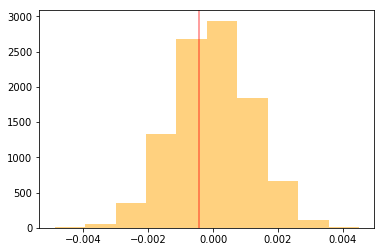

In [37]:
plt.hist(p_diffs, color="orange", alpha=0.5);
plt.axvline(x=diff, color="red", alpha=0.5);

_**The graph is normally distributed as expected.**_

`j.` What proportion of the _p-diffs_ are greater than the actual difference observed in `ab_data.csv`?

In [38]:
act_diffs = t_converted - c_converted
print(act_diffs)

-0.00157823898536


In [39]:
(p_diffs > act_diffs).mean()

0.90639999999999998

`k.` Please explain using the vocabulary you've learned in this course what you just computed in _part j._  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

_**With the type I error rate of 0.05, there is not enough evidence that the new page increases the user conversion rate.**_

_**Therefore we cannot reject the null hypothesis which suggests that the new page is no better than the old page.**_

`l.` We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let $n_{old}$  and $n_{new}$  refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`m.` Now use _stats.proportions_ _ _ztest_ to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [41]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = "larger")
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

`n.` What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in _parts j._ and _k._?

_**With a Z-score falling between 1.96 and -1.96 and P-value greater than 0.05, we cannot reject the null hypothesis. Under the null, conversion rates for the old and new page are equivalent to the conversion rate of the population data, regardless of the page recieved.**_

_**This is consistent with our findings in parts j. and k.**_

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

`a.` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

_**Logistic Regression Model.**_

`b.` The goal is to use _statsmodels_ to fit the regression model you specified in _part a._ To see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an _intercept_ column, as well as an _ab-page_ column, which is 1 when an individual receives the _treatment_ and 0 if _control_.

In [78]:
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2[['treatment', 'control']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,old_page,new_page,treatment,control
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


In [79]:
df2 = df2.drop(['group', 'landing_page', 'new_page', 'treatment'], axis=1)
df2.head()

,user_id,timestamp,converted,old_page,control
0,851104,2017-01-21 22:11:48.556739,0,1,0
1,804228,2017-01-12 08:01:45.159739,0,1,0
2,661590,2017-01-11 16:55:06.154213,0,0,1
3,853541,2017-01-08 18:28:03.143765,0,0,1
4,864975,2017-01-21 01:52:26.210827,1,1,0


In [102]:
df2 = df2.rename({'control':'ab_page'}, axis=1)
df2.head()

,user_id,timestamp,converted,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,0,1,0
1,804228,2017-01-12 08:01:45.159739,0,1,0
2,661590,2017-01-11 16:55:06.154213,0,0,1
3,853541,2017-01-08 18:28:03.143765,0,0,1
4,864975,2017-01-21 01:52:26.210827,1,1,0


`c.` Use _statsmodels_ to instantiate your regression model on the two columns you created. Then, fit the model using the two columns you created in _part b._ to predict whether or not an individual converts. 

In [91]:
import statsmodels.api as sm

df2_new['intercept'] = 1

logit_mod1 = sm.Logit(df2_new['converted'], df2_new[['intercept', 'ab_page']])
results1 = logit_mod1.fit()
results1.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-16 14:54 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [92]:
np.exp(results1.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [93]:
1 / np.exp(results1.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

`d.` Provide the summary of your model below, and use it as necessary to answer the following questions.

_**The chance of conversion is 1.02 times more likely when the user is on the AB-Test page than on the old page.**_

_**This could be due to change aversion displayed by the users who were used to with the old page.**_

_**The p-value of 0.199 means that the AB-Test page is not a statistically significant variable in predicting if the user converts or not.**_

`e.` What is the p-value associated with _ab-page_? Why does it differ from the value you found in _Part II_?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in _Part II_?

_**The P-value associated with the AB-Test page in our logistic model is 0.199 which is different from our sampling distribution model**_

_**This may be due to the fact that using a binomial simulation, we were able to run the test 1 million times. By running the experiment longer we may be able to create a wholistic picture of the experiment.**_

`f.` Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

_**Considering other factors would be beneficial for our model because usually real-world scenarios have multiple variables affecting the predictory variable. For example, consider the duration of a user's interaction with the page.**_

_**Key disadvantage would be multicollinearity which impacts the model coefficients and standard errors and makes interpreting variables seperately less of a priority and therefore harder to analyse seperately.**_

_**As a good practice, it is good to make use of both individual linear and multi linear regression models.**_

`g.` Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the `countries.csv` dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint:** You will need two columns for the three dummy variables. Provide the statistical output as well as a written response to answer this question.

In [94]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [95]:
df3 = df_countries.set_index('user_id').join(df2_new.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,converted,old_page,ab_page,intercept
user_id,,,,,,
834778,UK,2017-01-14 23:08:43.304998,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,0,0,1,1
822059,UK,2017-01-16 14:04:14.719771,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,0,0,1,1


In [96]:
df3['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [97]:
df3[['US', 'UK', 'CA']] = pd.get_dummies(df3['country'])

In [98]:
logit_mod2 = sm.Logit(df3['converted'], df3[['intercept', 'UK', 'CA']])
results2 = logit_mod2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-16 14:54 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
CA             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

_**Using US as a baseline..**_

_**If an individual is from the US, they are 0.05 times less likely to convert than if they were from the UK, holding Canada constant.**_

_**If an individual is from the US, they are 0.04 times less likely to convert than if they were from the Canada, holding UK constant.**_

_**However, the p-values suggest that adding countries as an explanatory variable is not statistically significant in determining the conversion predictory variable of an individual.**_

`h.` Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [99]:
logit_mod3 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'CA']])
results3 = logit_mod3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-16 14:54 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
CA             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [100]:
np.exp(results3.params)

intercept    0.131332
ab_page      0.985168
UK           1.051944
CA           1.041599
dtype: float64

In [101]:
1 / np.exp(results3.params)

intercept    7.614303
ab_page      1.015056
UK           0.950621
CA           0.960062
dtype: float64

_**results3 is consistent with results1 and results2 which means that there is not enough statistical evidence to suggest that the page and country have any interaction.**_

> ## "We have failed to reject the null hypothesis and therefore conclude that the e-commerce company should stick with the old page."  

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0